In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#데이터 불러오기(경로)
train_x_df = pd.read_csv('/content/drive/MyDrive/capstone2021/train_x_df.csv')
train_y_df = pd.read_csv('/content/drive/MyDrive/capstone2021/train_y_df.csv')
test_x_df = pd.read_csv('/content/drive/MyDrive/capstone2021/test_x_df.csv')
sample_submission=pd.read_csv('/content/drive/MyDrive/capstone2021/sample_submission.csv')
#merged_df=pd.read_hdf('/content/drive/MyDrive/capstone2021/merged_data.h5')
train_x_df = train_x_df.astype('float')
train_y_df = train_y_df.astype('float')
test_x_df = test_x_df.astype('float')
sample_submission=sample_submission.astype('float')

In [ ]:
# 3차원 array로 변경
def df2d_to_array3d(df_2d):

    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d



In [ ]:
train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
test_x_array = df2d_to_array3d(test_x_df)
#merged_array = df2d_to_array3d(merged_df)

In [ ]:
sex = np.concatenate((train_x_array,train_y_array),axis =1)

In [ ]:
sex.shape

(7661, 1500, 10)

In [ ]:
def kbindiscreter(input_array,feature_num):
  kb = KBinsDiscretizer(n_bins=100, strategy='uniform', encode='ordinal')
  processed_data = np.zeros((input_array.shape[0], input_array.shape[1], 1))
  for i in range(input_array.shape[0]):
    # coin_index_export args : (input_array, coin_num)
    processing_array = input_array[i,:,int(feature_num)]
    #globals()['outliery_array{}'.format(i)] = train_y_array[outlier[i],:,1]
    kb.fit(processing_array.reshape(input_array.shape[1],1))
    processed_fit = kb.transform(processing_array.reshape(input_array.shape[1],1))
    #globals()['outliery_fit{}'.format(i)] = kb.transform(globals()['outliery_array{}'.format(i)].reshape(120,1))
    processed_data[i,:,:] = processed_fit
  return processed_data
  

In [ ]:
for i in range(1,10):
    # coin_index_export args : (input_array, coin_num)
    globals()['x{}'.format(i)] = kbindiscreter(train_x_array, i)

In [ ]:
kk = kbindiscreter(train_x_array[1,:100,:].reshape(1,100,10), 1)

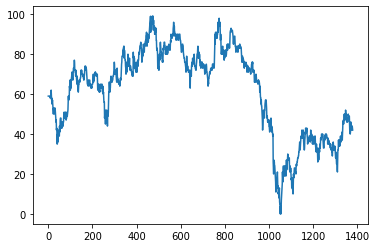

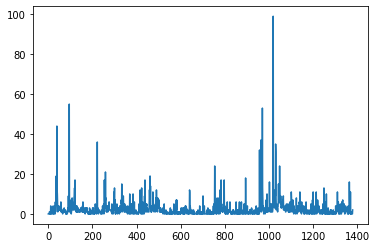

In [ ]:
plt.plot(x1[1,:,:])
plt.show()
plt.plot(x5[1,:,:])

In [ ]:
plt.plot(kk.reshape(-1))
plt.show()
plt.plot(x1[1,:100,:].reshape(-1))
plt.show()
plt.plot(train_x_array[1,:100,1].reshape(-1))

In [ ]:
for i in range(1,10):
  print(i)
  #plt.plot(globals()['x{}'.format(i)][1,:,:])
  plt.plot(globals()['x{}'.format(i)][1,:,:])
  plt.show()

In [ ]:
train_x_array[:,:,1].reshape(7661,1380,1)

(7661, 1380)

In [ ]:
kak = np.concatenate((train_x_array[:,:,1].reshape(7661,1380,1),train_x_array[:,:,5].reshape(7661,1380,1)),axis = 2)

In [ ]:
kak = np.concatenate((x1,x5,x8),axis =2)

In [ ]:
kak.shape

(7661, 1380, 3)

In [ ]:
X_traina = np.concatenate((x1,x5),axis = 2)

In [ ]:
df2.shape

(7661, 1380, 3)

In [ ]:
u=120
X_train = []
y_train = []
n_future = 120 # Number of days we want to predict into the future.
n_past = 360 # Number of past days we want to use to predict future.
for idx in range(df2.shape[0]):
    for i in range(9):
        X_train.append(df2[idx, i*u+60:60+i*u+n_past,:])
        y_train.append(df2[idx, i*u+n_past+60 : 60+i*u+n_past+n_future, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (68949, 360, 3).
y_train shape == (68949, 120).


In [ ]:
for i in range(3):
    # coin_index_export args : (input_array, coin_num)
    globals()['x{}'.format(i)] = kbindiscreter(X_train, i)

In [ ]:
X_train.shape

(7661, 1380, 2)

In [ ]:
y_traina = np.zeros((X_traina.shape[0],120))
for i in range(X_traina.shape[0]):
  for j in range(120):
    if np.argmax(train_y_array[i,:,1]) ==j:
      y_traina[i,j] = 1

In [ ]:
model = Sequential()
model.add(Conv1D(64,10, activation='relu', input_shape=(X_traina.shape[1],X_traina.shape[2] )))
model.add(Conv1D(32,5, activation='relu'))
model.add(Conv1D(32,4, activation='relu'))
model.add(Conv1D(16,4, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=120, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_traina,y_traina,epochs=100,validation_split=0.1,shuffle=True)

Epoch 1/100
216/216 [==============================] - 3s 10ms/step - loss: 5.2171 - accuracy: 0.0455 - val_loss: 4.6673 - val_accuracy: 0.0522
Epoch 2/100
216/216 [==============================] - 2s 8ms/step - loss: 4.4560 - accuracy: 0.0708 - val_loss: 4.6985 - val_accuracy: 0.0482
Epoch 3/100
216/216 [==============================] - 2s 8ms/step - loss: 3.3634 - accuracy: 0.2110 - val_loss: 5.2479 - val_accuracy: 0.0352
Epoch 4/100
216/216 [==============================] - 2s 8ms/step - loss: 1.4541 - accuracy: 0.6338 - val_loss: 6.6315 - val_accuracy: 0.0326
Epoch 5/100
216/216 [==============================] - 2s 8ms/step - loss: 0.5543 - accuracy: 0.8612 - val_loss: 9.7219 - val_accuracy: 0.0287
Epoch 6/100
216/216 [==============================] - 2s 8ms/step - loss: 0.2959 - accuracy: 0.9204 - val_loss: 11.0725 - val_accuracy: 0.0300
Epoch 7/100
216/216 [==============================] - 2s 8ms/step - loss: 0.2232 - accuracy: 0.9417 - val_loss: 11.9997 - val_accuracy: 0.0

In [ ]:
#val set 결과 보기

k=7000
n_past=1380
ddd = model.predict(X_traina[k:k+100,:,:].reshape(100,n_past,2))

In [ ]:
kk = np.zeros((100,120))
for x in range(100):
  for y in range(120):
    if np.argmax(ddd[x]) ==y:
      kk[x,y] =1  


In [ ]:
for i in range(100):
  print(i+1)
  # plt.ylim(0.96,1.05)
  plt.plot(train_y_array[i+k,:,1].reshape(-1),label = "true")
  # plt.plot(kk[i].reshape(-1), label = "prediction")
  plt.axvline(np.argmax(kk[i]), c ='red')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.